# ***Intro Support Vector Machines.***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***

## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
# Paquetes a usar.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/"

## ***Introducción.***

Una máquina de vectores de soporte (SVM) es un modelo de machine learning muy potente y versátil, ***capaz de realizar clasificación lineal o no lineal, regresión e incluso detección de valores atípicos***. Es uno de los modelos más populares en Machine Learning, y se debería tener entre las herramientas habituales. Las SVM son
particularmente adecuado para la clasificación de complejos pero pequeños o medianos conjuntos de datos.

## ***Método de SVM.***

Conceptualmente, las SVM son más fáciles de explicar para problemas de clasificación. Así que vamos con esta explicación.

Vamos a considerar el problema de clasificación de 2 clases como se muestra en la siguiente figura.

<center>

<img src="https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/images/svm_classi_imagen_3.png" alt="drawing" width="400" height = "200"/>

***Tomado de [wikipedía](https://www.google.com/search?q=images+svm&tbm=isch&ved=2ahUKEwjk1NbGgcX7AhWQv1MKHRaLAI4Q2-cCegQIABAA&oq=images+svm&gs_lcp=CgNpbWcQAzIGCAAQCBAeMgYIABAIEB5Qig5YiR1g0CRoAXAAeACAAZABiAGXB5IBAzEuN5gBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=EnF-Y-SDE5D_zgKWloLwCA&bih=668&biw=1366)***

</center>

La sepación de las clases se puede realizar vía un hiperplano (en este caso una recta), note que existen muchos hiperplanos que logran cumplir con la condición exigida.

El algoritmo de SVM busca responder la pregunta: ***¿Cuál es el mejor hiperplano (óptimo) de separación?*** 

La idea de mejor hiperplano dada por [`Vapnik`](https://en.wikipedia.org/wiki/Vladimir_Vapnik) es que el mejor de estos será aquel que logre tener el marguen más grande separando las 2 clases (piense en una carretera lo más ancha posible). Este será el mejor hiperplano para determinar la clase de nuevas observaciones.

### ***Un poco de matemáticas del método.***

El hiperplano óptimo tiene por ecuación:

$$\mathbf{w}^{T} \mathbf{x}+b=0$$

Donde $\mathbf{w}$ es un vector normal (ortogonal) al hiperplano y $b$ se conoce como el sesgo. Pensando en el problema de las 2 clases se cumple lo siguiente:

1. Si $\mathbf{w}^{T}\mathbf{x}+b>0$ la clase predicha $\hat{y}$ es la clase positiva (1).

2. Si $\mathbf{w}^{T}\mathbf{x}+b < 0$ la clase predicha $\hat{y}$ es la clase negativa (0).

Como deseamos obtener el margen más grande que separe las 2 clases vamos a considerar la distancia entre  hiperplanos que pasen en los puntos más cercanos de las dos clases (vectores de soporte). Al estar los datos estandarizados, podemos reescribir las condiciones anteriores como:

1. Si $\mathbf{w}^{T}\mathbf{x}+b\leq
1$, la clase predicha $\hat{y}$ es la clase positiva (1).

2. Si $\mathbf{w}^{T}\mathbf{x}+b \geq -1$, la clase predicha $\hat{y}$ es la clase negativa (0).



Ahora, el valor del margen se obtiene como:

$$MARGEN=\|proy_{w}\hspace{0.2em} \mathbf{x}_{+}\|- \|proy_{w}\hspace{0.2em} \mathbf{x}_{-}\|$$

donde: $\mathbf{x}_{-}$ y $\mathbf{x}_{-}$ son vectores soporte.

De lo anterior, facilmente se obtiene que:

$$MARGEN=\frac{2}{\|\mathbf{w}\|}$$

En resumen, debemos resolver el siguiente problema de optimización con restricciones:

$$\displaystyle \max_{\mathbf{w}}\hspace{0.4em} \frac{2}{\|\mathbf{w}\|}$$

Finalmente, este problema tiene un análogo en minimización y será el problema que se debe resolver con las SVM:

$$\begin{align}
&\displaystyle \min_{\mathbf{w},b}\hspace{2em} \frac{1}{2}\mathbf{w}^{T}\mathbf{w}\\
&\text{sujeto a}\hspace{1em} t_{i}\left(\mathbf{w}^{T}\mathbf{x}_{i}+b\right)\geq1\hspace{2em} \text{Para $i=1,2,\cdots,m$}
\end{align}$$


Donde:

1. $t_{i}=-1$ para la clase negativa $\left(\text{si }y_{i}=0\right)$ y $t_{i}=1$ para la clase positiva $\left(\text{si }y_{i}=1\right)$.

2. $\mathbf{x}_{i}$ es un registro del dataset y la igualdad de las restricciones se cumple para los vectores de soporte.

Al derivar y pensar en el [`problema dual`](https://es.wikipedia.org/wiki/Programa_lineal_dual) tenemos:

$$\begin{align}
&\displaystyle \min_{\mathbf{λ}}\hspace{2em} \frac{1}{2}\displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{m}\lambda_{i}\lambda_{j}t_{i}t_{j}\left(\mathbf{x}_{i}^{T}\cdot\mathbf{x}\right)-\displaystyle\sum_{i=1}^{m}\lambda_{i}\\
&\text{sujeto a}\hspace{1em} \lambda_i\geq 0 \hspace{2em} \text{Para $i=1,2,\cdots,m$}
\end{align}$$

### ***Soft Margin Classification.***

Si imponemos estrictamente que todas las instancias estén fuera de la margen y del lado correcto, esto se denomina _hard margin classification_ (clasificación de margen duro). Hay dos problemas principales con el con _hard margin classification_. 

1. Solo funciona si los datos son linealmente separables.

2. Es bastante sensible a los valores atípicos. 

Para evitar estos problemas, es preferible utilizar un modelo más flexible. El objetivo es encontrar un buen equilibrio entre mantener la margen lo más grande posible y limitar las violaciones de margen (es decir, instancias que terminan dentro de la margen o incluso incluso en el lado incorrecto). Esto se llama _soft margin classification_.

En la clase [`SVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) de Scikit-Learn, se puede controlar este equilibrio usando el hiperparámetro `C`, tenga en cuenta lo siguiente:

1. Un valor de `C` más pequeño conduce a una ***margen*** más ancha pero conduce a más violaciones de la de margen. 

2. Con un valor de `C` alto el clasificador comete menos violaciones de ***margen*** pero la ***margen*** en sí será pequeña.

Note que en el caso de la situación 1, parece probable que ***generalice mejor*** apesar que tiene "muchas" violaciones del margen.

***Sugerencia:***

Si un modelo de `SVM` presenta _overfitting_ se puede intentar regularizar reduciendo el valor de `C`.

En este caso en el problema de optimización se necesita introducir una variable de holgura ([`variable slack`](https://en.wikipedia.org/wiki/Slack_variable#:~:text=In%20an%20optimization%20problem%2C%20a,constraint%20on%20the%20slack%20variable.) )   $\zeta_i\geq0$ para cada registro: $\zeta_i$ mide cuánto se le permite al registro $i$ violar la margen. Con esto tenemos dos objetivos en conflicto:

1. Hacer que las variables de holgura sean lo más pequeñas como sea posible para reducir las violaciones de margen.

2. Hacer que $\frac{1}{2}\hspace{0.2em}\mathbf{w}^{T}\mathbf{w}$ lo más pequeño posible para aumentar el margen.

Aquí es donde entra el hiperparámetro `C`: nos permite
definir el [`trade-off`](https://medium.com/lets-talk-ml/the-trade-off-in-machine-learning-f6b30f38a527) entre estos dos objetivos. Con esto tenemos el siguiente problema de optimización con restricción:

$$\begin{align}
&\displaystyle \min_{\mathbf{w},b,\mathbf{\zeta}}\hspace{2em} \frac{1}{2}\mathbf{w}^{T}\mathbf{w}+C\displaystyle\sum_{i=1}^{m}\zeta_i\\
&\text{sujeto a}\hspace{1em} t^{(i)}\left(\mathbf{w}^{T}\mathbf{x}^{(i)}+b\right)\geq1-\zeta_i\hspace{0.4em} \text{y}\hspace{0.4em}\zeta_i\geq0\hspace{1em} \text{Para $i=1,2,\cdots,m$}
\end{align}$$

### ***Funciones Kernel***

¿Que podemos hacer cuando no existe la separación lineal?

<center>

<img src="https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/images/svm_kernel_1.png" alt="drawing" width="400" height = "190"/>

<img src="https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/images/svm_kernel_2.png" alt="drawing" width="400" height = "200"/>


***Tomado de [wikipedía](https://www.google.com/search?q=images+svm&tbm=isch&ved=2ahUKEwjk1NbGgcX7AhWQv1MKHRaLAI4Q2-cCegQIABAA&oq=images+svm&gs_lcp=CgNpbWcQAzIGCAAQCBAeMgYIABAIEB5Qig5YiR1g0CRoAXAAeACAAZABiAGXB5IBAzEuN5gBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=EnF-Y-SDE5D_zgKWloLwCA&bih=668&biw=1366)***

</center>

Una función kernel es una función definida como: $K(x_1,x_2):\mathbb{R}^{m}\times\mathbb{R}^{m}\rightarrow\mathbb{R}$, con la particularidad de que puede ser expresado como un producto interno en otro espacio por medio de una función de mapeo $ϕ(x):\mathbb{R}^{m}\rightarrow\mathbb{R}^{k}$. Es decir, se cumple la ecuación:

$$K(x_1,x_2)=ϕ(x_1)^{T}ϕ(x_2)$$

### ***Funciones kernel más usadas.***

Para aumentar la dimensión de las variables y construir funciones más complejas se pueden usar:
1. Lineal 
$$K(x_1,x_2)=x_1^{T}\cdot x_2$$

2. Polinómico
$$K(x_1,x_2)=(x_1^{T}\cdot x_2+a)^d$$
No se recomienda $d>5$ por _overffiting_.

3. Gaussiana (RBF)

$$K(x_1,x_2)=exp\left(-\gamma\|x_1-x_2\|^{2}\right)$$

4. Sigmoid

$$K(x_1,x_2)=\tanh\left(\gamma(x_1^{T}\cdot x_2)+r\right)$$


### ***Ejemplo 1.***

Se sugiere revisar la documentación en detalle de:

1. [`SVM de sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
2. [`Guía del usuario de SVM`](https://scikit-learn.org/stable/modules/svm.html#svm-classification)
3. [`LinearSVC de sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
4. [`SGDClassifier de sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

In [2]:
## Con load_breast_cancer de los datasets de sklearn.
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                         columns=np.append(cancer['feature_names'], ['target']))
print(f'Tamaño del dataset de cancer: {df_cancer.shape}')
df_cancer.sample(5)

Tamaño del dataset de cancer: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
42,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.099610,0.2310,0.06343,...,33.17,177.40,1651.0,0.1247,0.7444,0.72420,0.24930,0.4670,0.10380,0.0
144,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769,1.0
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.017370,0.1707,0.05433,...,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464,1.0
326,14.11,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.027330,0.1373,0.05700,...,18.00,98.40,749.9,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083,1.0
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.056690,0.1895,0.06870,...,35.34,87.22,514.0,0.1909,0.2698,0.40230,0.14240,0.2964,0.09606,0.0


In [3]:
# La variables objetivo es si tiene cancer o no
df_cancer['target'].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

In [4]:
## Pequeño preprocessing de la data
scaler = StandardScaler()
X = df_cancer.drop(columns=['target'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df_cancer['target'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

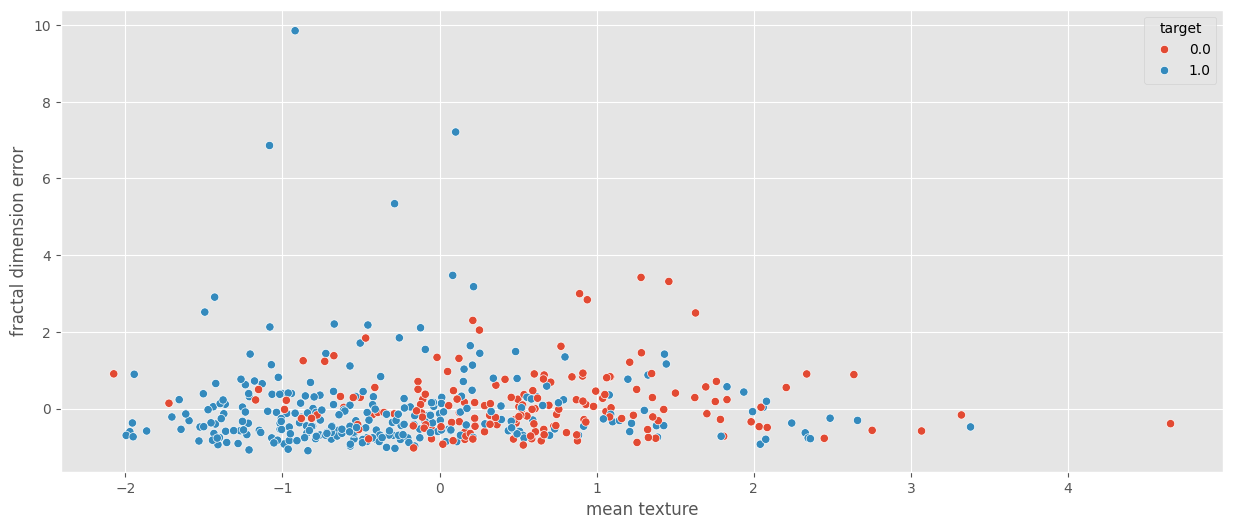

In [5]:
sns.scatterplot(data=X_train, x='mean texture', y='fractal dimension error', hue=y_train);

In [6]:
## Primer clasificador SVM
#%%time
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [7]:
%%time
print(f'En TRAIN: {svm_clf.score(X_train,y_train)}')
print(f'En TEST:  {svm_clf.score(X_test,y_test)}')

En TRAIN: 0.9868131868131869
En TEST:  0.9824561403508771
CPU times: user 7.86 ms, sys: 833 μs, total: 8.69 ms
Wall time: 8.27 ms


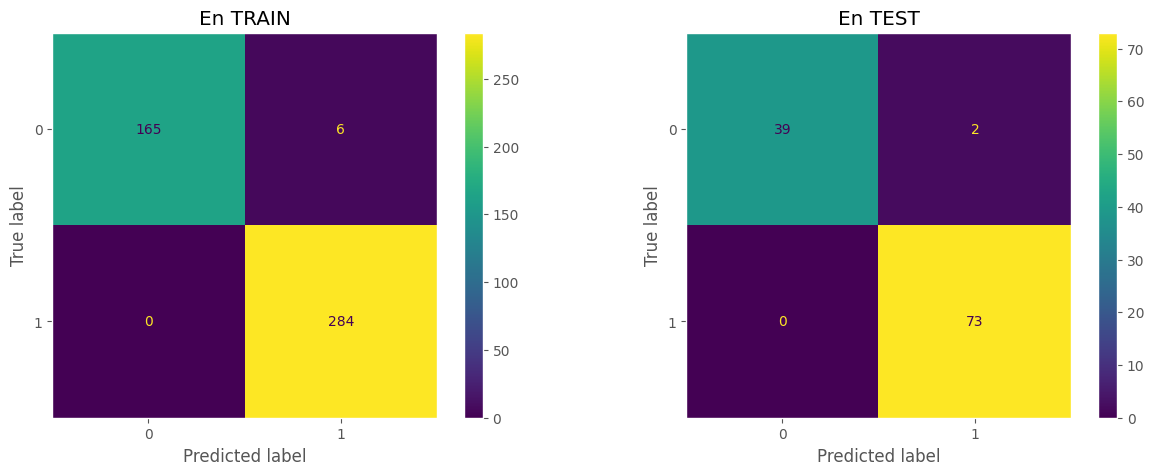

In [8]:
## Matriz de confusión.
prediction_train = svm_clf.predict(X_train)
cm_train = confusion_matrix(y_train,prediction_train, labels=[0,1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0,1])
##
prediction_test = svm_clf.predict(X_test)
cm_test = confusion_matrix(y_test, prediction_test, labels=[0,1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1])
## Plot confusion matrix
fig, ax = plt.subplots(1,2,figsize=(15,5))
##
disp_train.plot(ax=ax[0],)
ax[0].set_title('En TRAIN')
ax[0].grid(False)
##
disp_test.plot(ax=ax[1],)
ax[1].grid(False)
ax[1].set_title('En TEST')
##
plt.show()

In [9]:
## Probemos otro escalador
min_max_scaler = MinMaxScaler()
X = df_cancer.drop(columns=['target'])
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
y = df_cancer['target'].astype('category')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
%%time
## Segundo clasificador SVM
svm_clf2 = SVC(C=1, kernel="poly")
svm_clf2.fit(X_train, y_train)
print(f"En TRAIN: {svm_clf2.score(X_train,y_train):.4f}")
print(f"En TEST:  {svm_clf2.score(X_test,y_test):.4f}")

En TRAIN: 0.9121
En TEST:  0.8684
CPU times: user 14.3 ms, sys: 126 μs, total: 14.4 ms
Wall time: 13.8 ms


In [11]:
%%time
# Tercer clasificador SVM
svm_clf3 = SVC(C=1, kernel="linear")
svm_clf3.fit(X_train, y_train)
print(f"En TRAIN: {svm_clf3.score(X_train,y_train):.4f}")
print(f"En TEST:  {svm_clf3.score(X_test,y_test):.4f}")

En TRAIN: 0.9868
En TEST:  0.9912
CPU times: user 10.2 ms, sys: 976 μs, total: 11.2 ms
Wall time: 11 ms


In [12]:
%%time
## Cuarto clasificador SVM
svm_clf4 = SVC(C=1, kernel="rbf", gamma="scale")
svm_clf4.fit(X_train, y_train)
print(f"En TRAIN: {svm_clf4.score(X_train,y_train):.4f}")
print(f"En TEST:  {svm_clf4.score(X_test,y_test):.4f}")

En TRAIN: 0.9868
En TEST:  0.9825
CPU times: user 14.6 ms, sys: 249 μs, total: 14.9 ms
Wall time: 14.4 ms


In [13]:
## Quinto clasificador SVM
svm_clf5 = LinearSVC()
svm_clf5.fit(X_train, y_train)
print(f"En TRAIN: {svm_clf5.score(X_train,y_train):.4f}")
print(f"En TEST:  {svm_clf5.score(X_test,y_test):.4f}")

En TRAIN: 0.9890
En TEST:  0.9912


In [14]:
## Sexto clasificador SVM
svm_clf6 = SGDClassifier()
svm_clf6.fit(X_train, y_train)
print(f"En TRAIN: {svm_clf6.score(X_train,y_train):.4f}")
print(f"En TEST:  {svm_clf6.score(X_test,y_test):.4f}")

En TRAIN: 0.9824
En TEST:  0.9912


### ***Fronteras del algoritmo.***

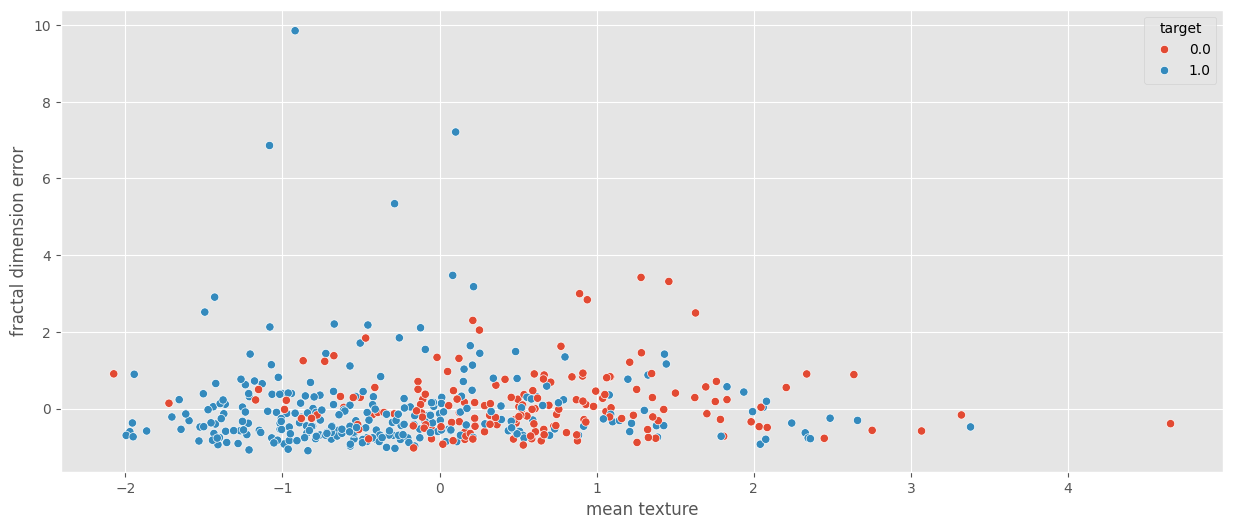

In [15]:
sns.scatterplot(data=X_train, x="mean texture", y="fractal dimension error", hue=y_train);

Score en TRAIN: 0.6967032967032967
Score en TEST:  0.6754385964912281


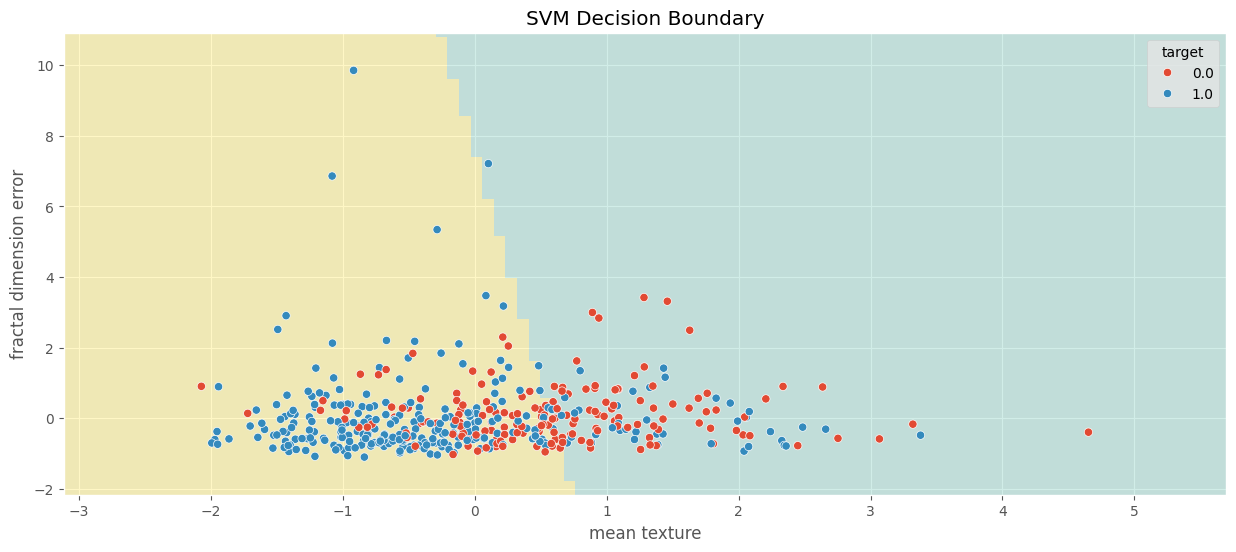

In [16]:
X_plot = X_train[['mean texture', 'fractal dimension error']].values
y_plot = y_train

minX = min(X_plot[:, 0]) - 1
maxX = max(X_plot[:, 0]) + 1
minY = min(X_plot[:, 1]) - 1
maxY = max(X_plot[:, 1]) + 1

n = 100  
ax = np.linspace(minX, maxX, n)
ay = np.linspace(minY, maxY, n)
xx, yy = np.meshgrid(ax, ay)


grid_points = np.c_[xx.ravel(), yy.ravel()]


C = 1
svm_clf_plot = SVC(C=C, kernel='linear')
svm_clf_plot.fit(X_train[['mean texture', 'fractal dimension error']], y_train)


print(f'Score en TRAIN: {svm_clf_plot.score(X_plot, y_train)}')
score_test = svm_clf_plot.score(X_test[['mean texture', 'fractal dimension error']], y_test)
print(f'Score en TEST:  {score_test}')


zz = svm_clf_plot.predict(grid_points)
zz = zz.reshape(xx.shape)  


fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot)
plt.xlabel('mean texture')
plt.ylabel('fractal dimension error')
plt.title('SVM Decision Boundary')
plt.show()


Score en TRAIN: 0.7296703296703296
Score en TEST:  0.7719298245614035


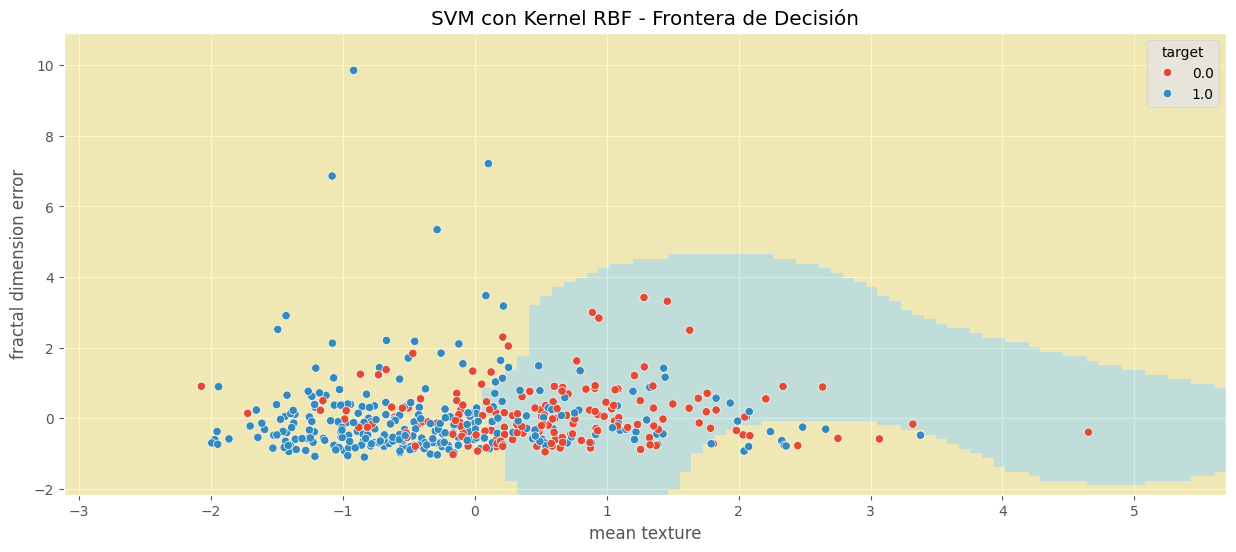

In [17]:
## Creamos el modelo SVM-rbf
C = 1
svm_clf_plot1 = SVC(C=C, kernel='rbf')
svm_clf_plot1.fit(X_train[['mean texture', 'fractal dimension error']], y_train)
print(f'Score en TRAIN: {svm_clf_plot1.score(X_plot, y_train)}')
score_test = svm_clf_plot1.score(X_test[['mean texture', 'fractal dimension error']], y_test)
print(f'Score en TEST:  {score_test}')

zz = svm_clf_plot1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot, ax=ax)

plt.xlabel('mean texture')
plt.ylabel('fractal dimension error')
plt.title('SVM con Kernel RBF - Frontera de Decisión')
plt.show()

Score en TRAIN: 0.643956043956044
Score en TEST:  0.6754385964912281


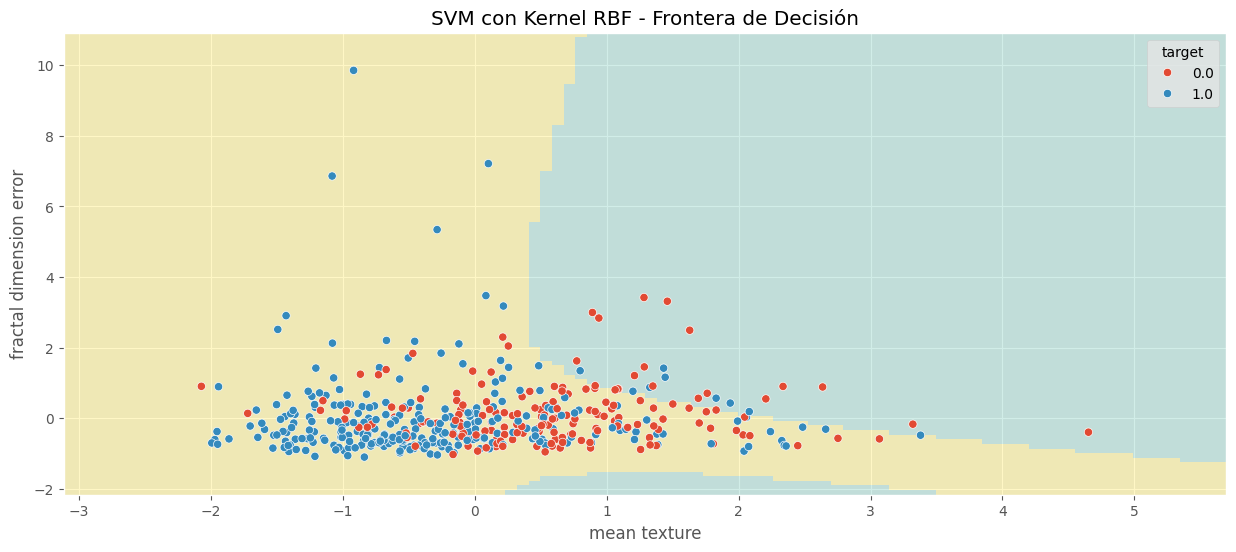

In [18]:
## Creamos el modelo SVM-poly
C = 1
svm_clf_plot1 = SVC(C=C, kernel='poly')
svm_clf_plot1.fit(X_train[['mean texture', 'fractal dimension error']], y_train)
print(f'Score en TRAIN: {svm_clf_plot1.score(X_plot, y_train)}')
score_test = svm_clf_plot1.score(X_test[['mean texture', 'fractal dimension error']], y_test)
print(f'Score en TEST:  {score_test}')

zz = svm_clf_plot1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot, ax=ax)

plt.xlabel('mean texture')
plt.ylabel('fractal dimension error')
plt.title('SVM con Kernel RBF - Frontera de Decisión')
plt.show()

Score en TRAIN: 0.643956043956044
Score en TEST:  0.6052631578947368


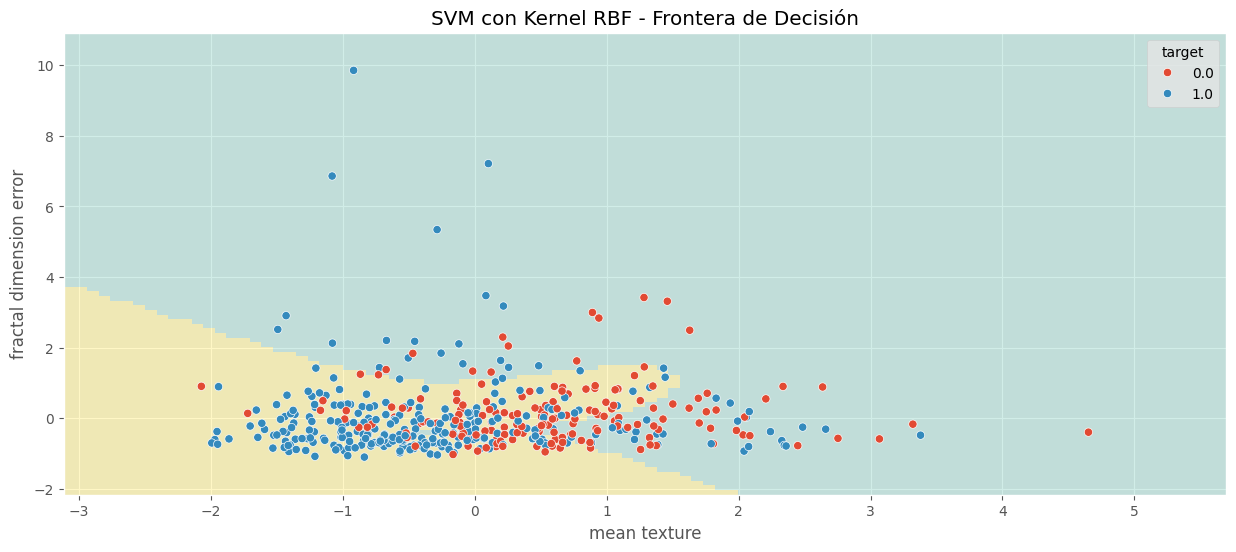

In [19]:
## Creamos el modelo SVM-sigmoid
C = 1
svm_clf_plot1 = SVC(C=C, kernel='sigmoid')
svm_clf_plot1.fit(X_train[['mean texture', 'fractal dimension error']], y_train)
print(f'Score en TRAIN: {svm_clf_plot1.score(X_plot, y_train)}')
score_test = svm_clf_plot1.score(X_test[['mean texture', 'fractal dimension error']], y_test)
print(f'Score en TEST:  {score_test}')

zz = svm_clf_plot1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=y_plot, ax=ax)

plt.xlabel('mean texture')
plt.ylabel('fractal dimension error')
plt.title('SVM con Kernel RBF - Frontera de Decisión')
plt.show()

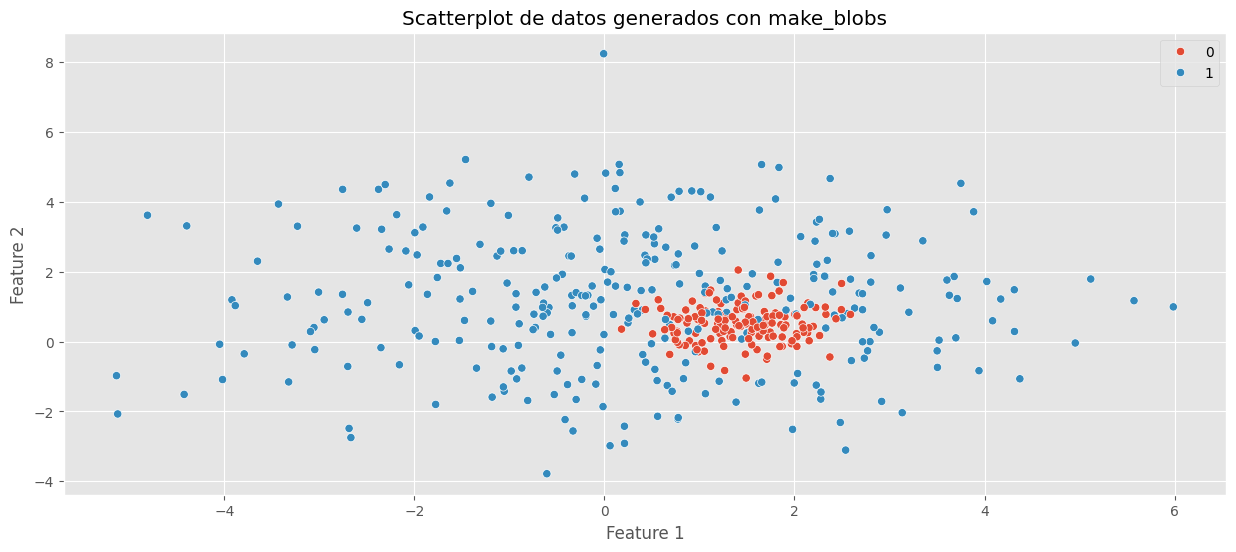

In [20]:
# Probemos con make_blobs
X, y = make_blobs(
    n_samples=[150, 300],
    random_state=123,
    cluster_std=[0.5, 2.0],
    center_box=(0, 2)
)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot de datos generados con make_blobs')
plt.show()

Score en TRAIN: 0.5778
Valor hiperparámetro C de regularización: 1000


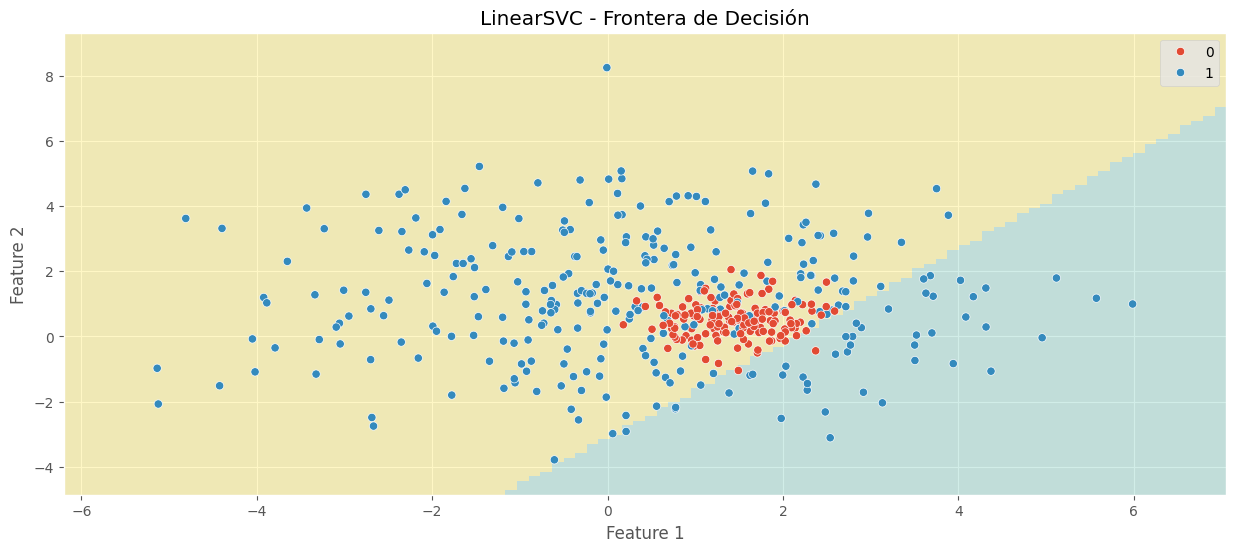

In [21]:
minX, maxX = X[:, 0].min() - 1, X[:, 0].max() + 1
minY, maxY = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generar grid
n = 100
ax = np.linspace(minX, maxX, n)
ay = np.linspace(minY, maxY, n)
xx, yy = np.meshgrid(ax, ay)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Crear y entrenar el modelo LinearSVC
C = 1000
linear_svm = LinearSVC(C=C)
linear_svm.fit(X, y)

# Imprimir métricas
print(f"Score en TRAIN: {linear_svm.score(X, y):.4f}")
print(f"Valor hiperparámetro C de regularización: {C}")

# Predicciones para el grid
zz = linear_svm.predict(grid_points).reshape(xx.shape)

# Visualización
fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap("Set3"), alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("LinearSVC - Frontera de Decisión")
plt.show()

Score en TRAIN: 0.5778
Valor hiperparámetro C de regularización: 1000


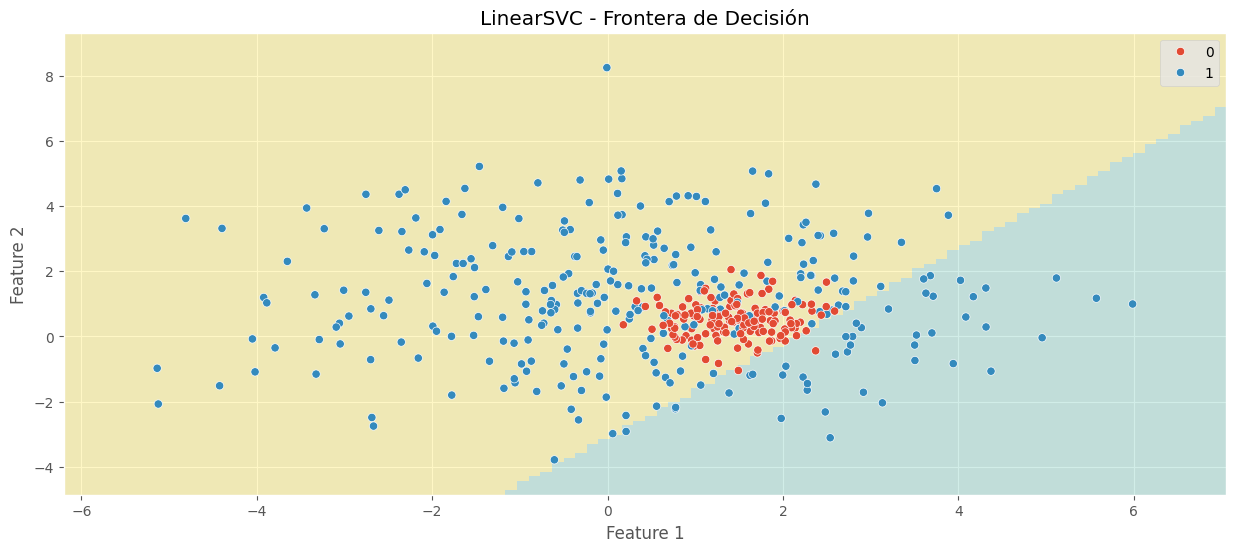

In [22]:
minX = min(X[:, 0]) - 1
maxX = max(X[:, 0]) + 1
minY = min(X[:, 1]) - 1
maxY = max(X[:, 1]) + 1

n = 100
ax = np.linspace(minX, maxX, n)
ay = np.linspace(minY, maxY, n)
xx, yy = np.meshgrid(ax, ay)
grid_points = np.c_[xx.ravel(), yy.ravel()]

C = 1000
linear_svm = LinearSVC(C=C)
linear_svm.fit(X, y)

print(f'Score en TRAIN: {linear_svm.score(X, y):.4f}')
print(f'Valor hiperparámetro C de regularización: {C}')

zz = linear_svm.predict(grid_points).reshape(xx.shape)

fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LinearSVC - Frontera de Decisión')
plt.show()


Score en TRAIN: 0.9089
Hiperparámetro C de regularización: 1
Kernel: rbf


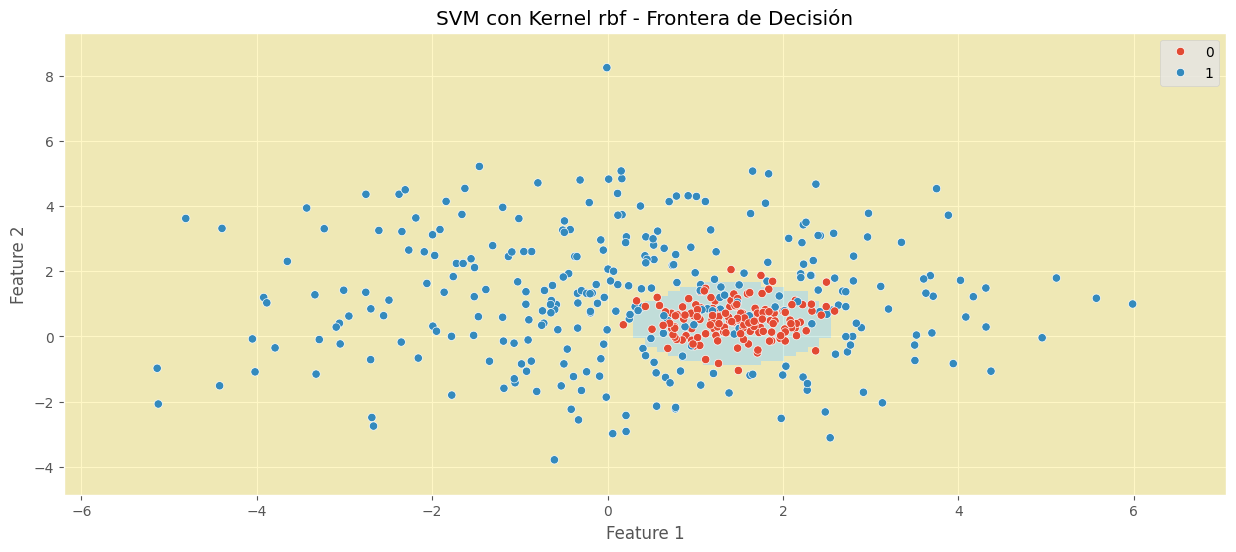

In [23]:
n = 100
ax = np.linspace(minX, maxX, n)
ay = np.linspace(minY, maxY, n)
xx, yy = np.meshgrid(ax, ay)
grid_points = np.c_[xx.ravel(), yy.ravel()]

C = 1
kernel = "rbf"
svm_clf_rbf = SVC(C=C, kernel=kernel)
svm_clf_rbf.fit(X, y)

print(f"Score en TRAIN: {svm_clf_rbf.score(X, y):.4f}")
print(f"Hiperparámetro C de regularización: {C}")
print(f"Kernel: {kernel}")

zz = svm_clf_rbf.predict(grid_points).reshape(xx.shape)

fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap("Set3"), alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"SVM con Kernel {kernel} - Frontera de Decisión")
plt.show()

Score en TRAIN: 0.9089
Hiperparámetro C de regularización: 1
Kernel: rbf


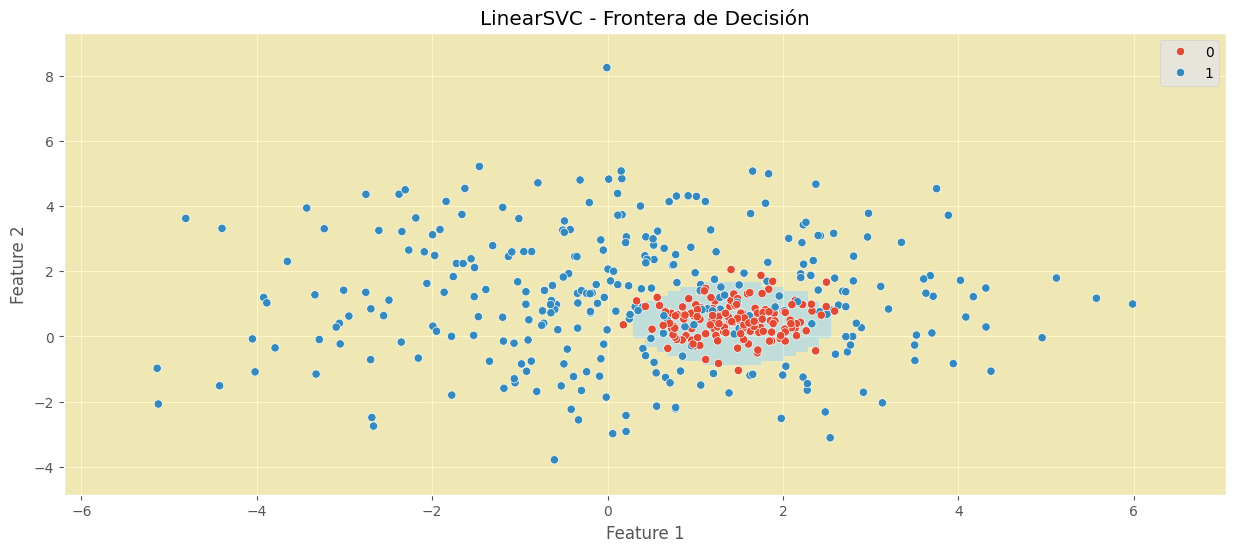

In [24]:
## Creamos el modelo SVM-rbf
C = 1
kernel = 'rbf'
svm_clf_rbf = SVC(C=C, kernel=kernel)
svm_clf_rbf.fit(X, y)
print(f'Score en TRAIN: {svm_clf_rbf.score(X,y):.4f}')
print(f'Hiperparámetro C de regularización: {C}')
print(f'Kernel: {kernel}')

fig, ax = plt.subplots()
plt.pcolormesh(xx, yy, zz, cmap=plt.get_cmap('Set3'), alpha=0.4)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LinearSVC - Frontera de Decisión')
plt.show()

### ***Regresión con SVM***

El algoritmo `SVM` es bastante versátil: no solo admite clasificación lineal y no lineal, también admite regresión lineal y no lineal. El truco consiste en invertir el objetivo, es decir, `SVM` en  regresión trata de encajar tantos registros como sea posible en la margen mientras limita violaciones de margen (es decir, registros fuera de la margen). El ancho de la margen está controlado por el hiperparámetro `ϵ`. 

Agregar más instancias de registros en el set de train  dentro del margen no afectan las predicciones del modelo; por lo tanto, se dice que el modelo es `ϵ`-insensible. 



***Nota:***

1. Puede utilizar la clase `LinearSVR` de Scikit-Learn para realizar una regresión `SVM` lineal esta implementación  mejora el tiempo de entrenamiento.

1. Para abordar tareas de regresión no lineal, puede usar un modelo `SVM` kernelizado. 

2. El hiperparámetro `C` sigue cumpliendo que: con valores grandes de `C` hay poca regularización y con valores de `C` pequeños se obtiene mucha más regularización.

3. La clase [`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) de scikit-learn es el método de regresión para `SVM`, además puede utilizar la clase [`LinearSVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html) para realizar una regresión `SVM` lineal (kernel lineal), esta implementación  mejora el tiempo de entrenamiento, pues escala linealmente con el tamaño del set de train (como `LinearSVC`), mientras que la clase `SVR` se vuelve demasiado lenta cuando el set de train crece (al igual que `SVC`).

La Figura 5-10 muestra dos modelos de regresión SVM lineal entrenados en algunos datos lineales aleatorios, uno con un gran margen (`ϵ=1.5`) y el otro con un pequeño margen (`ϵ=0,5`).

El siguiente código produce el modelo representado a la izquierda de la Figura 5-10 (la formación los datos deben ser escalados y centrados primero):

 en  en lugar de intentar encajar el mayor posible calle entre dos clases mientras se limitan las violaciones de margen, SVM en 

### ***Ejemplo 2.***

In [25]:
df_boston = pd.read_csv(url_base + "boston_house_prices.csv", skiprows=1)
df_boston = df_boston.rename(columns={"MEDV": "target"})
print(f'Tamaño del dataset de boston: {df_boston.shape}')
df_boston.head()

Tamaño del dataset de boston: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
# Preprocesamiento
scaler = StandardScaler()
X = df_boston.drop(columns=['target'])
y = df_boston['target']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
# Modelo SVR
svr_model = SVR(kernel="linear")
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [28]:
print(f'Score en TRAIN: {svr_model.score(X_train, y_train):.3f}')
print(f'Score en TEST:  {svr_model.score(X_test, y_test):.3f}')

Score en TRAIN: 0.725
Score en TEST:  0.615
